In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [9]:
def mypgmread(filename):
    with open(filename, 'rb') as f:
        header = []
        # PGM dosyasının başlık bilgileri okundu
        while True:
            line = f.readline().decode('ascii').strip()
            if not line or line.startswith('#'):
                continue
            header.append(line)
            if len(header) == 3:
                break

        if len(header) < 3:
            print("Geçersiz PGM dosya formatı.")
            return None

        # Genişlik, yükseklik ve maksimum değer başlık bilgilerinden alındı
        width, height = map(int, header[1].split())
        maxval = int(header[2])

        # Veriyi okundu
        pixel_values = np.fromfile(f, dtype=np.uint8, count=width * height)

        # Veriyi boyutlarına uygun şekilde yeniden şekillendildi
        pixel_values = pixel_values.reshape((height, width))

        return pixel_values, width, height, maxval


### Figure 3.4

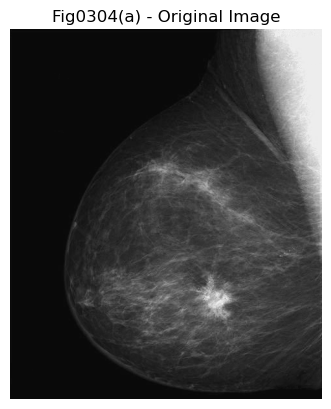

maximum value : 255


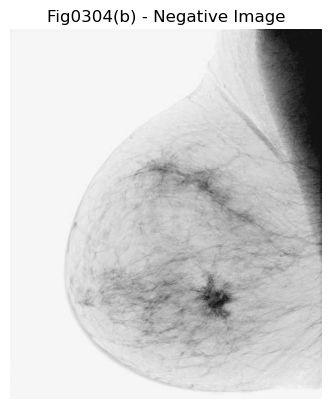

In [10]:
def imagenegative(maxval, imgval):
    neg_imgval = maxval - imgval #s = L - 1 - r işlemi
    return neg_imgval
    
Fig0304, width, height, maxval = mypgmread('mammogram.pgm')
plt.imshow(Fig0304, cmap='gray')
plt.title('Fig0304(a) - Original Image')
plt.axis('off')  # Eksenleri kapatıldı
plt.show()
print("maximum value :",maxval)


negative_image = imagenegative(maxval,Fig0304) #Fonksiyon ile resmin negatifi oluşruldu
plt.imshow(negative_image, cmap='gray')
plt.title('Fig0304(b) - Negative Image')
plt.axis('off') 
plt.show()




Göüntünün negatifini almak için s = L - 1 - r formülünden yararlanılmıştır. Orjinal görüntünün içeriği bu işleme tabii tutularak negatifi alınır. Figure0304(a) başlıklı şekilde görüntünün orjinali verilmiştir. Figure0304(b) başlıklı şekilde ise negatifi alınan görüntü gösterilmektedir.

### Figure 3.5

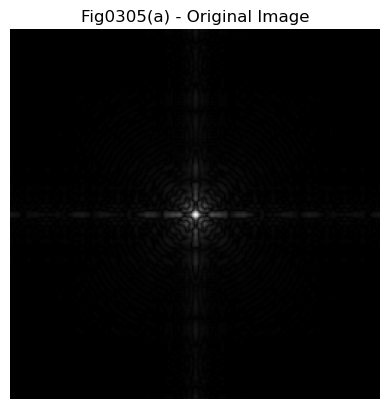

C:\Users\senaa\AppData\Local\Temp\ipykernel_16796\1528956344.py:2: RuntimeWarning: divide by zero encountered in log
  log_imgval=np.log(imgval+1) #s=c⋅log(1+r) işlemi


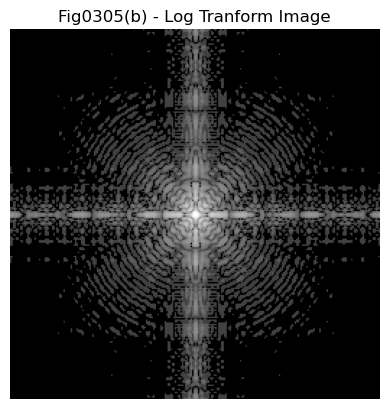

In [11]:
def logtransform(imgval):
    log_imgval=np.log(imgval+1) #s=c⋅log(1+r) işlemi
    return log_imgval
    
Fig0305, width, height, maxval = mypgmread('Fig0305.pgm')
plt.imshow(Fig0305, cmap='gray')
plt.title('Fig0305(a) - Original Image')
plt.axis('off')  # Eksenleri kapatıldı
plt.show()


plt.imshow(logtransform(Fig0305), cmap='gray')
plt.title('Fig0305(b) - Log Tranform Image')
plt.axis('off')  # Eksenleri kapatıldı
plt.show()

Log dönüşümü ile giriş değerleri daha geniş bir çıkış seviyesi aralığı ile eşlenilir.Log dönüşümü s=c⋅log(1+r) formülü ile ifade edilir. Bu dönüşüm, giriş piksel değeri(r) arttıkça, çıkış piksel değeri (s) logaritmik olarak artar. Yani, daha koyu pikseller daha fazla genişletilirken, daha açık pikseller daha az genişletilir. Bu, özellikle düşük kontrastlı görüntülerdeki ayrıntıları daha belirgin hale getirir. Figure0305(a) başlıklı şekil ve Figure0305(b) başlıklı şekil karşılaştırıldığında açık renkli piksellerin arttığı gözlemlenmiştir.

### Figure 3.8

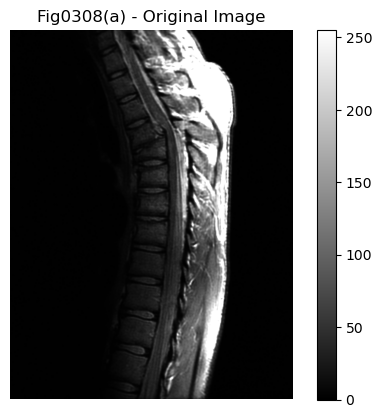

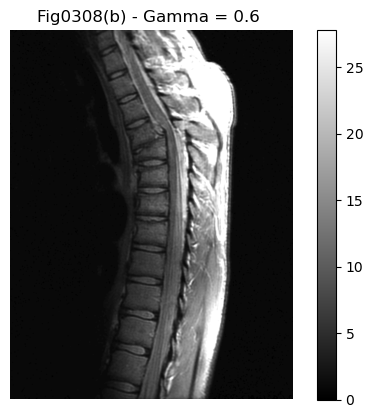

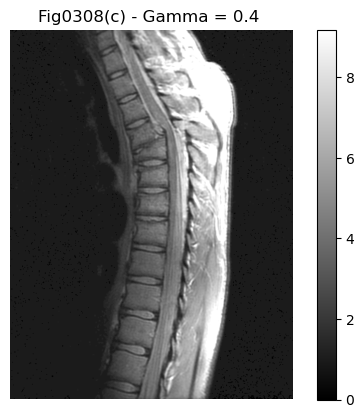

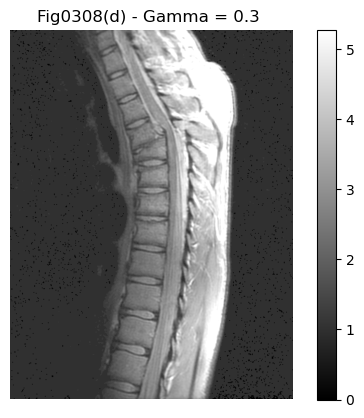

In [12]:
def gammatransform(imgval,gamma,c):
    gamma_imgval= c*pow(imgval,gamma) #s = cr^g
    return gamma_imgval


Fig0308, width, height, maxval = mypgmread('Fig0308.pgm')
plt.imshow(Fig0308, cmap='gray')
plt.colorbar()
plt.title('Fig0308(a) - Original Image')
plt.axis('off')  # Eksenleri kapatıldı
plt.show()
#Farklı gama değerleri için gama transformu gerçekleştirilmiştir.
gamma_06 = gammatransform(Fig0308, 0.6,1)
plt.imshow(gamma_06, cmap='gray')
plt.colorbar()
plt.title('Fig0308(b) - Gamma = 0.6 ')
plt.axis('off')  # Eksenleri kapatıldı
plt.show()

gamma_04 = gammatransform(Fig0308, 0.4,1)
plt.imshow(gamma_04, cmap='gray')
plt.colorbar()
plt.title('Fig0308(c) - Gamma = 0.4 ')
plt.axis('off')  # Eksenleri kapatıldı
plt.show()

gamma_03 = gammatransform(Fig0308, 0.3,1)
plt.imshow(gamma_03, cmap='gray')
plt.colorbar()
plt.title('Fig0308(d) - Gamma = 0.3 ')
plt.axis('off')  # Eksenleri kapatıldı
plt.show()


Gamma Transformu s = cr^g ile ifade edilir. 
Gama değeri azaldıkça görüntünün ayrıntılarının belirginleştiriği görülmüştür. Orjinal resimdeki koyu renkli pikseller genişletilerek daha ayrıntılı bir resim elde edilmiştir. Farklı gama değerlerine göre elde edilen şekiller karşılaştırıldığında gamanın 0.3 olduğu değerde ayrıntılı olduğu görülmüştür fakat bu şekilde de arka planın soluklaştığı gözlemlenmiştir. Gamanın 0.4 olduğu değerde ise hem ayrıntılar gözükmektedir hem de arka planda soluklaşma yoktur. Gama 0.6 değerinde ise ayrıntıların daha az görüldüğü gözlemlenmiştir. 

### Figure 3.8

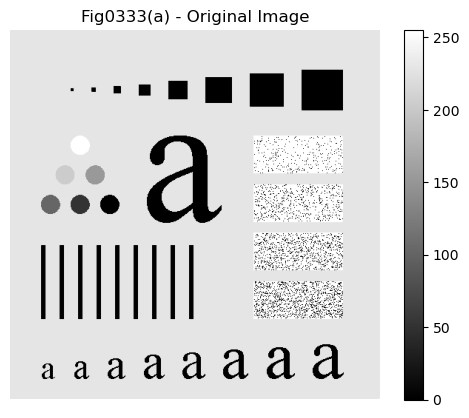

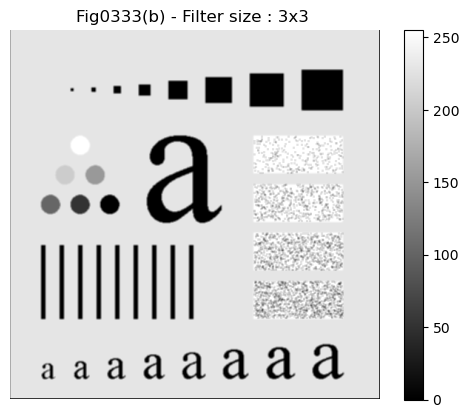

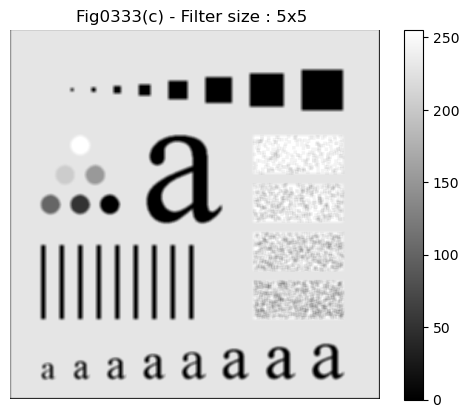

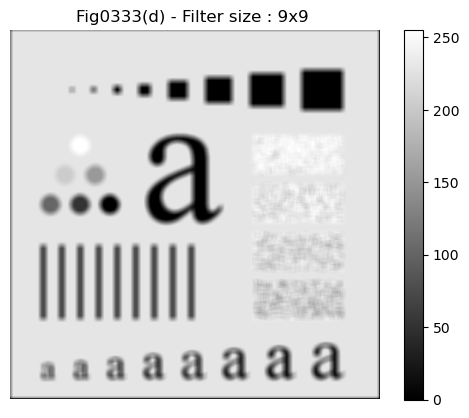

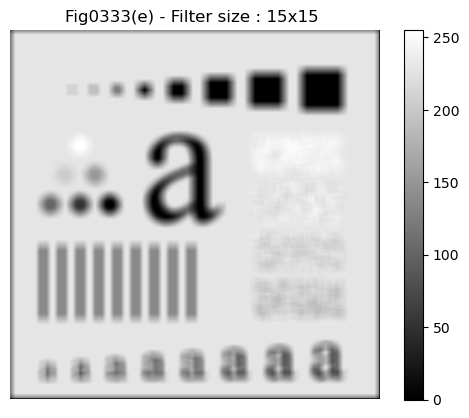

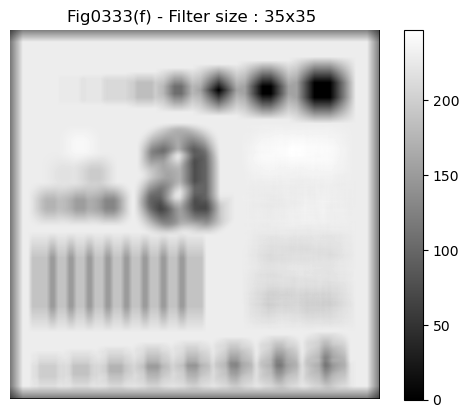

In [13]:
def averagingfilter(imgval,width,height,maxval,filtersize):
    mask = np.ones([filtersize,filtersize], dtype = int)  #maske oluşturulur
    mask= mask/pow(filtersize,2)
    size = filtersize
    pnum = filtersize//2
    
    padding=np.pad(imgval,pnum,mode='constant')   #padding yapılır
    img_new=np.zeros([height,width])
    
    for i in range(0, height-1):
        for j in range(0, width-1):
            data = padding[i:i+size, j:j+size]  #average filter 
            datamean = np.mean(data)
            img_new[i,j] = datamean
    img_new= img_new.astype(np.uint8)
    return img_new

Fig0333, width, height, maxval = mypgmread('Fig0333.pgm')
plt.imshow(Fig0333, cmap='gray')
plt.colorbar()
plt.title('Fig0333(a) - Original Image')
plt.axis('off')
plt.show()

#Farklı filtre boyutları için 
filter3x3 = averagingfilter(Fig0333, width, height, maxval,3)
plt.imshow(filter3x3, cmap='gray')
plt.colorbar()
plt.title('Fig0333(b) - Filter size : 3x3 ')
plt.axis('off')  # Eksenleri kapatıldı
plt.show()

filter5x5 = averagingfilter(Fig0333, width, height, maxval,5)
plt.imshow(filter5x5, cmap='gray')
plt.colorbar()
plt.title('Fig0333(c) - Filter size : 5x5 ')
plt.axis('off')  # Eksenleri kapatıldı
plt.show()

filter9x9 = averagingfilter(Fig0333, width, height, maxval,9)
plt.imshow(filter9x9, cmap='gray')
plt.colorbar()
plt.title('Fig0333(d) - Filter size : 9x9 ')
plt.axis('off')  # Eksenleri kapatıldı
plt.show()


filter15x15 = averagingfilter(Fig0333, width, height, maxval,15)
plt.imshow(filter15x15, cmap='gray')
plt.colorbar()
plt.title('Fig0333(e) - Filter size : 15x15 ')
plt.axis('off')  # Eksenleri kapatıldı
plt.show()

filter35x35 = averagingfilter(Fig0333, width, height, maxval,35)
plt.imshow(filter35x35, cmap='gray')
plt.colorbar()
plt.title('Fig0333(f) - Filter size : 35x35 ')
plt.axis('off')  # Eksenleri kapatıldı
plt.show()

Avarage filtrede filtre boyutu arttıkça görüntünün bulanıklaştığı gözlemlenmiştir.Filtre boyutu 3x3 ve 5x5 iken bulanıklaşma en az seviyededir fakat bu değer attıkça görüntüdeki detaylar azalarak görüntü bulanıklaşmıştır. 9x9 ve 15x15 görüntüde bulanıklaşma belirginleşmeye başlamıştır. 35x35 olan görüntüde ise bulanıklaşma maksimum seviyededir ve kenarlardaki siyahlıklar belirginleşmiştir. 

### Figure 3.8

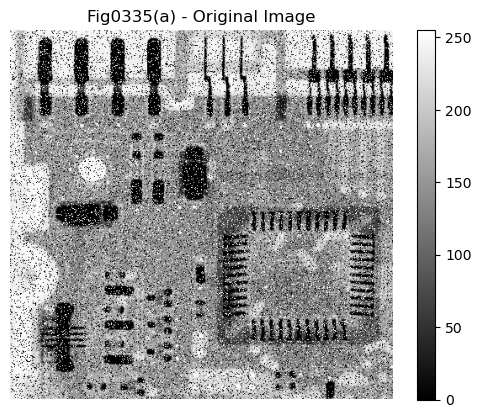

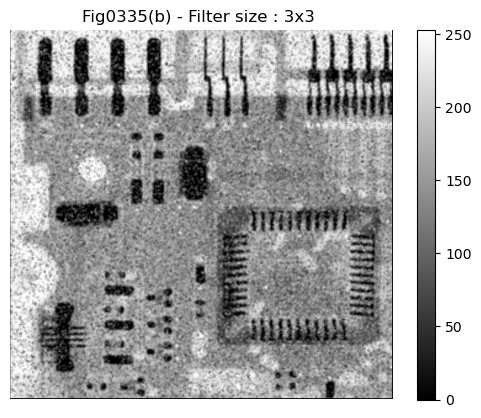

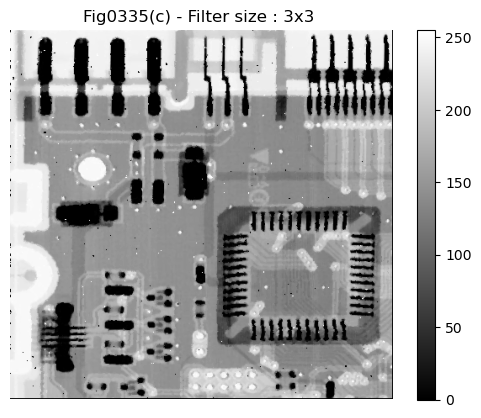

In [14]:
def medianfilter(imgval,width,height,maxval,filtersize):
    mask = np.ones([filtersize,filtersize], dtype = int)  #maske olusturulur
    mask= mask/pow(filtersize,2)
    size = filtersize
    pnum = filtersize//2
    
    padding=np.pad(imgval,pnum,mode='constant') #padding yapılır
    img_new=np.zeros([height,width])
    
    for i in range(0, height-1):
        for j in range(0, width-1):
            data = padding[i:i+size, j:j+size]
            datamean = np.median(data) #median filter ayarlamaları yapılır
            img_new[i,j] = datamean
    img_new= img_new.astype(np.uint8)
    return img_new

Fig0335, width, height, maxval = mypgmread('Fig0335.pgm')
plt.imshow(Fig0335, cmap='gray')
plt.colorbar()
plt.title('Fig0335(a) - Original Image')
plt.axis('off')  # Eksenleri kapatıldı
plt.show()


filter3x3 = averagingfilter(Fig0335, width, height, maxval,3) #average filter
plt.imshow(filter3x3, cmap='gray')
plt.colorbar()
plt.title('Fig0335(b) - Filter size : 3x3 ')
plt.axis('off')  # Eksenleri kapatıldı
plt.show()

filtermedian = medianfilter(Fig0335, width, height, maxval,3) #median filter
plt.imshow(filtermedian, cmap='gray')
plt.colorbar()
plt.title('Fig0335(c) - Filter size : 3x3 ')
plt.axis('off')  # Eksenleri kapatıldı
plt.show()


Her iki filtrenin de verdiği görüntüde gürültü azaltılmıştır. Ancak medyan filtre daha başarılı bir gürültü azaltma işlemi gerçekleştirmiştir ve detayları arttırmıştır.Orjinal resimde ve mean filtrede hiç belli olmayan karttaki yollar medyan filtrede belli olmaktadır.